In [23]:
#### Importing the libraries ----
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

In [2]:
### Loading the dataset ----
data = pd.read_csv('C:/Users/Pc/OneDrive/Pictures/Data science assignments/week 13/b88assignments/Project - 1&2_ Simple_Reg/Project - 1&2_ Simple_Reg/Salary_Data.csv', sep = ',')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
### Making a copy of the data
df = data.copy()
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## EDA and Data Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
df.shape

(30, 2)

In [6]:
# Correlation Analysis
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [7]:
print("The skewness of the dataset is as follows - ")
print(df.skew())

The skewness of the dataset is as follows - 
YearsExperience    0.37956
Salary             0.35412
dtype: float64


In [8]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


C:\Users\Pc\AppData\Local\Temp\ipykernel_5292\2884492742.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Salary'])


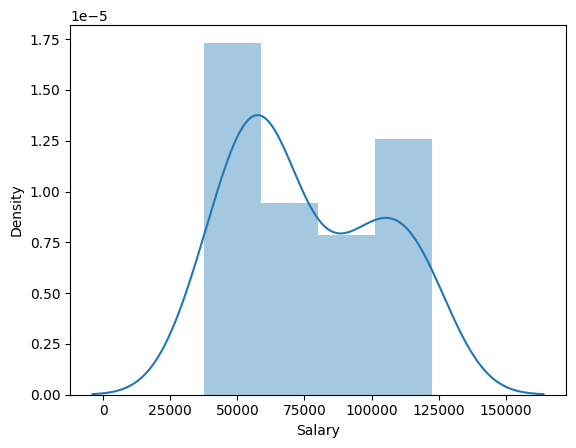

In [9]:
sns.distplot(df['Salary'])
plt.savefig("Distplot of Salary.png")
plt.show()

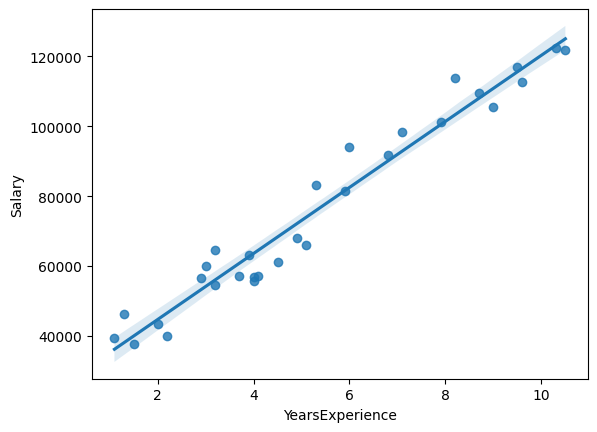

In [10]:
sns.regplot(x = 'YearsExperience', y = 'Salary', data = df)
plt.savefig("Regplot between Yeasrs of experience and Salary.png")
plt.show()

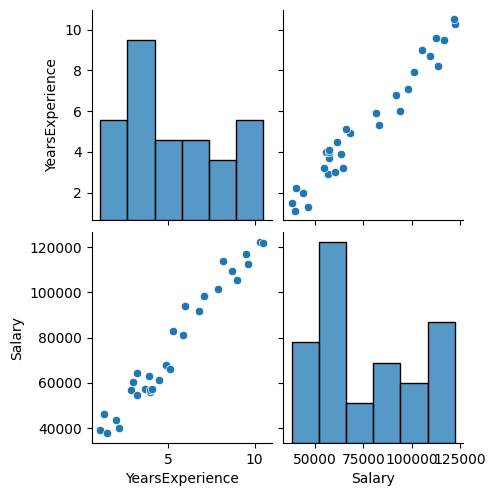

In [27]:
sns.pairplot(df)
plt.savefig("Pair plot.png")
plt.show()

## Inference ---- As the experience of an employee increases, the salary of the employee also increases which shows a direct relationship between years of experience and salary hike.

## Model Building

In [11]:
x = df['YearsExperience'].values
x = x.reshape(-1,1)
print(x)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [12]:
y = df['Salary'].values
y = y.reshape(-1,1)
print(y)

[[ 39343.]
 [ 46205.]
 [ 37731.]
 [ 43525.]
 [ 39891.]
 [ 56642.]
 [ 60150.]
 [ 54445.]
 [ 64445.]
 [ 57189.]
 [ 63218.]
 [ 55794.]
 [ 56957.]
 [ 57081.]
 [ 61111.]
 [ 67938.]
 [ 66029.]
 [ 83088.]
 [ 81363.]
 [ 93940.]
 [ 91738.]
 [ 98273.]
 [101302.]
 [113812.]
 [109431.]
 [105582.]
 [116969.]
 [112635.]
 [122391.]
 [121872.]]


In [13]:
model = LinearRegression()
print(model)

LinearRegression()


In [14]:
#### Training the Model/Sytem  - By Fitting my data
model_fit = model.fit(x,y)
print(model_fit)

LinearRegression()


In [15]:
model_fit.coef_

array([[9449.96232146]])

In [16]:
model_fit.intercept_

array([25792.20019867])

In [17]:
predict = model_fit.predict(x)  #### Will be done on test data for validation and after that raw data
predict

array([[ 36187.15875227],
       [ 38077.15121656],
       [ 39967.14368085],
       [ 44692.12484158],
       [ 46582.11730587],
       [ 53197.09093089],
       [ 54142.08716303],
       [ 56032.07962732],
       [ 56032.07962732],
       [ 60757.06078805],
       [ 62647.05325234],
       [ 63592.04948449],
       [ 63592.04948449],
       [ 64537.04571663],
       [ 68317.03064522],
       [ 72097.0155738 ],
       [ 73987.00803809],
       [ 75877.00050238],
       [ 81546.97789525],
       [ 82491.9741274 ],
       [ 90051.94398456],
       [ 92886.932681  ],
       [100446.90253816],
       [103281.8912346 ],
       [108006.87239533],
       [110841.86109176],
       [115566.84225249],
       [116511.83848464],
       [123126.81210966],
       [125016.80457395]])

In [18]:
##### Raw Data for Predictions
X1 = np.array([5,4,11, 6.5,3.5, 3, 8])
X1
X1 = X1.reshape(-1,1)
X1

array([[ 5. ],
       [ 4. ],
       [11. ],
       [ 6.5],
       [ 3.5],
       [ 3. ],
       [ 8. ]])

In [19]:
### Predicton for the raw data entered
model_fit.predict(X1).round(2)

array([[ 73042.01],
       [ 63592.05],
       [129741.79],
       [ 87216.96],
       [ 58867.07],
       [ 54142.09],
       [101391.9 ]])

In [21]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, predict))
print('Mean Squared Error:', metrics.mean_squared_error(y, predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, predict)))

Mean Absolute Error: 4644.2012894435375
Mean Squared Error: 31270951.722280968
Root Mean Squared Error: 5592.043608760662


In [24]:
r2_accuracy = r2_score(y, predict)

In [26]:
print("The strength of the model is ",round(r2_accuracy, 2))

The strength of the model is  0.96
